In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
for module in tf, mpl, np, pd, sklearn:
    print(module.__name__, module.__version__)

tensorflow 2.5.0
matplotlib 3.3.4
numpy 1.20.1
pandas 1.2.4
sklearn 0.24.1


In [3]:
(x_train_all, y_train_all), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(np.max(x_train), np.min(x_train))

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)
255 0


In [4]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [5]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train_scaled, y_train, epochs=10,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 2ms/step - loss: 0.4557 - accuracy: 0.8320 - val_loss: 0.3500 - val_accuracy: 0.8734
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3533 - accuracy: 0.8695 - val_loss: 0.3374 - val_accuracy: 0.8746
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3175 - accuracy: 0.8806 - val_loss: 0.3470 - val_accuracy: 0.8788
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2920 - accuracy: 0.8905 - val_loss: 0.3185 - val_accuracy: 0.8848
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.8973 - val_loss: 0.3063 - val_accuracy: 0.8906
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2566 - accuracy: 0.9039 - val_loss: 0.3096 - val_accuracy: 0.8944
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2440 - accuracy: 0.9073 - val_loss: 0.3151 - val_accuracy:

In [8]:
def plot_learning_curver(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

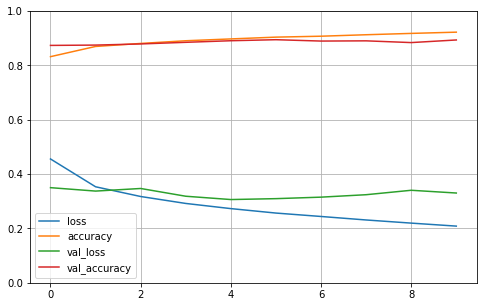

In [9]:
plot_learning_curver(history)

In [10]:
model.evaluate(x_test_scaled, y_test, verbose=2)

313/313 - 0s - loss: 0.3576 - accuracy: 0.8849


[0.35760602355003357, 0.8848999738693237]

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


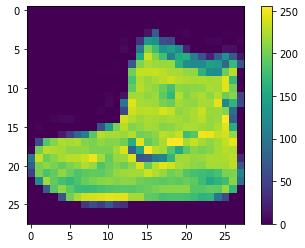

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

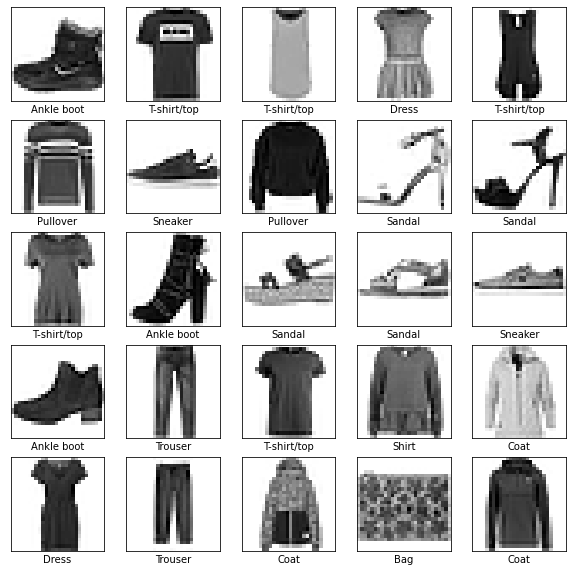

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=[28, 28]),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4981 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3773 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3360 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3128 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8917


In [19]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8762


[0.3425268232822418, 0.8762000203132629]

In [20]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[1.67389317e-05 1.05214404e-07 2.62428671e-06 1.57154386e-06
 3.40805150e-06 1.95330824e-03 1.70993428e-06 1.43246427e-02
 8.08195764e-05 9.83615100e-01]
9
9


In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

In [22]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

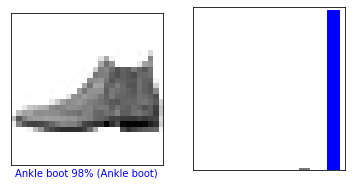

In [23]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

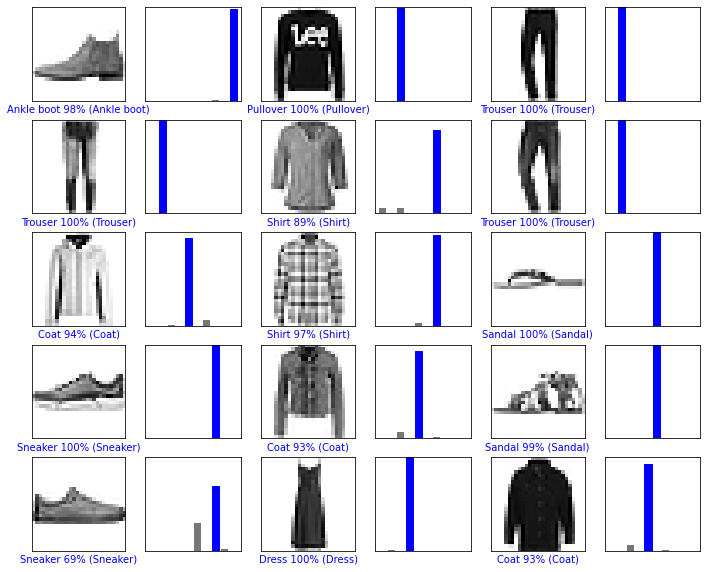

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

img = test_images[0]

img = (np.expand_dims(img, 0))

In [25]:
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.67389317e-05 1.05214404e-07 2.62428671e-06 1.57154386e-06
  3.40805150e-06 1.95330824e-03 1.70993428e-06 1.43246427e-02
  8.08195764e-05 9.83615100e-01]]


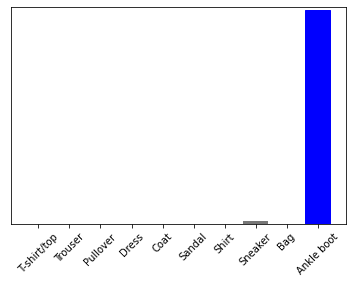

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [29]:
print(tf.__version__)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

2.5.0
matplotlib 3.3.4
numpy 1.20.1
pandas 1.2.4
sklearn 0.24.1
tensorflow 2.5.0
tensorflow.keras 2.5.0


In [30]:
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


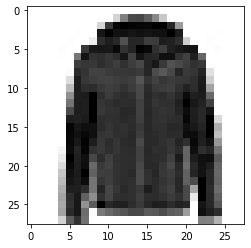

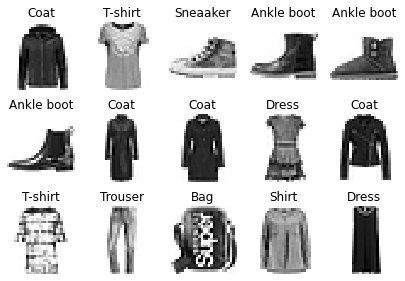

In [31]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()


show_single_image(x_train[0])


def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap='binary',
                       interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()


class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaaker',
               'Bag', "Ankle boot"]
show_imgs(3, 5, x_train, y_train, class_names)

In [32]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
print(model.layers)

[<tensorflow.python.keras.layers.core.Flatten object at 0x000001FC8332E4F0>, <tensorflow.python.keras.layers.core.Dense object at 0x000001FCAD835E20>, <tensorflow.python.keras.layers.core.Dense object at 0x000001FD46F93670>, <tensorflow.python.keras.layers.core.Dense object at 0x000001FD5E59E760>]


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.6975 - accuracy: 0.7560 - val_loss: 0.6596 - val_accuracy: 0.8050
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5239 - accuracy: 0.8216 - val_loss: 0.4772 - val_accuracy: 0.8486
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4503 - accuracy: 0.8411 - val_loss: 0.4755 - val_accuracy: 0.8334
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4208 - accuracy: 0.8492 - val_loss: 0.4903 - val_accuracy: 0.8276
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4129 - accuracy: 0.8531 - val_loss: 0.4208 - val_accuracy: 0.8606
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4026 - accuracy: 0.8561 - val_loss: 0.3927 - val_accuracy: 0.8622
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3840 - accuracy: 0.8622 - val_loss: 0.3907 - val_accuracy:

In [37]:
type(history)

tensorflow.python.keras.callbacks.History

In [38]:
print(history.history)

{'loss': [2.697493076324463, 0.5239178538322449, 0.45030689239501953, 0.4207775890827179, 0.41285768151283264, 0.4025702178478241, 0.3840249180793762, 0.36780837178230286, 0.36116400361061096, 0.35574591159820557], 'accuracy': [0.7559818029403687, 0.8215818405151367, 0.8411272764205933, 0.8492181897163391, 0.8531454801559448, 0.8560909032821655, 0.8622182011604309, 0.8669999837875366, 0.8702727556228638, 0.8734727501869202], 'val_loss': [0.6595574617385864, 0.47717270255088806, 0.4755207896232605, 0.4902620017528534, 0.42075052857398987, 0.3926699459552765, 0.39069855213165283, 0.36429187655448914, 0.37287217378616333, 0.38130640983581543], 'val_accuracy': [0.8050000071525574, 0.8485999703407288, 0.8334000110626221, 0.8276000022888184, 0.8605999946594238, 0.8622000217437744, 0.8578000068664551, 0.8723999857902527, 0.8726000189781189, 0.8758000135421753]}


In [39]:
def plot_learning_curver(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

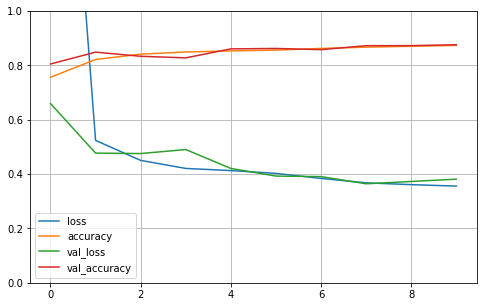

In [40]:
plot_learning_curver(history)

plt.show()

In [41]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [42]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_lables) = fashion_mnist.load_data()

In [43]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_lables))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


In [44]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5029 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3358 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2942 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2801 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2695 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2566 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [48]:
test_loss, test_acc = model.evaluate(test_images, test_lables)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8839
0.883899986743927


In [49]:
predictions = model.predict(test_images)
print(predictions[0])

[1.8381863e-08 6.6645266e-11 7.0353146e-08 2.7750593e-10 5.3461456e-08
 4.9065659e-04 4.4053092e-08 7.9383571e-03 2.3952222e-07 9.9157059e-01]


In [50]:
print(np.argmax(predictions[0]))
print(test_lables[0])

9
9


In [51]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [52]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [53]:
train_images = np.expand_dims(train_images, -1)
print(train_images.shape)

test_images = np.expand_dims(test_images, -1)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=train_images.shape[1:], 
                                 activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [55]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)        

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [57]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 33s 10ms/step - loss: 0.8512 - acc: 0.6835 - val_loss: 0.4563 - val_acc: 0.8329
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4334 - acc: 0.8420 - val_loss: 0.3771 - val_acc: 0.8693
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3748 - acc: 0.8625 - val_loss: 0.3362 - val_acc: 0.8782
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3380 - acc: 0.8763 - val_loss: 0.3020 - val_acc: 0.8911
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3169 - acc: 0.8838 - val_loss: 0.2875 - val_acc: 0.8989
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3020 - acc: 0.8897 - val_loss: 0.2741 - val_acc: 0.9026
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2901 - acc: 0.8941 - val_loss: 0.2853 - val_acc: 0.8963
Epoch 8/10
1875/1875 [==========================

In [58]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


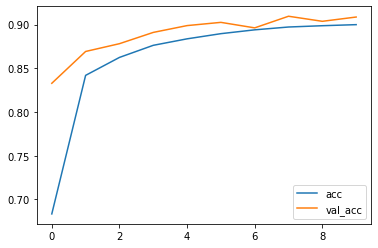

In [59]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

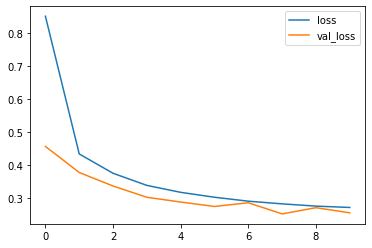

In [60]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()